# Assignment 2
## New Car Loan Interest Rates
#### Submitted By : Saikiran N. Pasikanti

In [1]:
import pandas as pd
import os
from scipy import stats

# Set directory
os.chdir("C://Users/Sai/Desktop/PYTHON_007/Assignments/Assignment1")

# Importing the .dat file
car = pd.read_table("newcar.dat", skiprows=25, sep="\s+", names=['Y','X'])

In [2]:
car.head()

,Y,X
0,13.75,1
1,13.75,1
2,13.50,1
3,13.50,1
4,13.00,1


In [3]:
df1 = car.loc[car['X'] == 1].reset_index(drop=True)
df2 = car.loc[car['X'] == 2].reset_index(drop=True)
df3 = car.loc[car['X'] == 3].reset_index(drop=True)
df4 = car.loc[car['X'] == 4].reset_index(drop=True)
df5 = car.loc[car['X'] == 5].reset_index(drop=True)
df6 = car.loc[car['X'] == 6].reset_index(drop=True)

df7 = pd.concat([df1, df2,df3, df4, df5, df6], axis=1)

df = df7.drop(['X'],axis=1)

df.columns = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']
df

,C1,C2,C3,C4,C5,C6
0,13.75,14.25,14.00,15.00,14.50,13.50
1,13.75,13.00,14.00,14.00,14.00,12.25
2,13.50,12.75,13.51,13.75,14.00,12.25
3,13.50,12.50,13.50,13.59,13.90,12.00
4,13.00,12.50,13.50,13.25,13.75,12.00
5,13.00,12.40,13.25,12.97,13.25,12.00
6,13.00,12.30,13.00,12.50,13.00,12.00
7,12.75,11.90,12.50,12.25,12.50,11.90
8,12.50,11.90,12.50,11.89,12.45,11.90


In [4]:
## Interest rates are in highest to lowest orders
## Rows = Interest rate records from various banks
## Columns = Cities

df.dtypes

C1    float64
C2    float64
C3    float64
C4    float64
C5    float64
C6    float64
dtype: object

In [6]:
df.mean()

C1    13.194444
C2    12.611111
C3    13.306667
C4    13.244444
C5    13.483333
C6    12.200000
dtype: float64

In [33]:
# The standard deviation of interest rates in all the cities
df.std(ddof=1)

C1    0.446825
C2    0.710096
C3    0.556350
C4    0.967007
C5    0.718940
C6    0.504356
dtype: float64

In [37]:
# The variance of interest rates in all the cities
df.var()

C1    0.199653
C2    0.504236
C3    0.309525
C4    0.935103
C5    0.516875
C6    0.254375
dtype: float64

In [5]:
df8 = df-df.mean()
df8
# Sweeping out city means
# The nine entries in each column are the remainders after subtracting
#  the column means from the data values
# They are the deviation of each replication from the cell mean

,C1,C2,C3,C4,C5,C6
0,0.555556,1.638889,0.693333,1.755556,1.016667,1.30
1,0.555556,0.388889,0.693333,0.755556,0.516667,0.05
2,0.305556,0.138889,0.203333,0.505556,0.516667,0.05
3,0.305556,-0.111111,0.193333,0.345556,0.416667,-0.20
4,-0.194444,-0.111111,0.193333,0.005556,0.266667,-0.20
5,-0.194444,-0.211111,-0.056667,-0.274444,-0.233333,-0.20
6,-0.194444,-0.311111,-0.306667,-0.744444,-0.483333,-0.20
7,-0.444444,-0.711111,-0.806667,-0.994444,-0.983333,-0.30
8,-0.694444,-0.711111,-0.806667,-1.354444,-1.033333,-0.30


Above tables is nothing but residual after fitting a linear mean curve

Variable City effect will be calculated in next step

In [34]:
df8.std(ddof=1)

C1    0.446825
C2    0.710096
C3    0.556350
C4    0.967007
C5    0.718940
C6    0.504356
dtype: float64

In [6]:
## Here common mean value= 13.01
## Sweeping the common value from the city means
## The remainder is the city effect
df9 = df.mean()-(df.mean()).mean()
df9

C1    0.187778
C2   -0.395556
C3    0.300000
C4    0.237778
C5    0.476667
C6   -0.806667
dtype: float64

The common value = 13.01% which indicates that the mean annual interest on new car loans in the six cities

C6 has the lowest rates on average among all the citeis. Its rates are 0.81% less than the overall mean.

C5 has the highest rate, 0.48% more than the overall mean.

Within a city the spread between the highest and lowest interest rates varies between 1.25% in C1 and 3.11% in C4

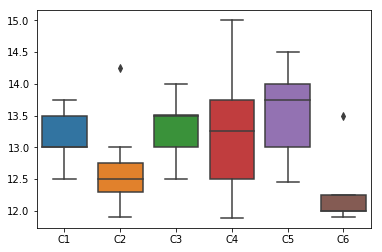

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df)
plt.show()

### Infrences
In C1, C3, C6, the median and the lower fourth are equal

C5 has the highest average and C6 has the lowest

In C4, rates vary more than those in any other city

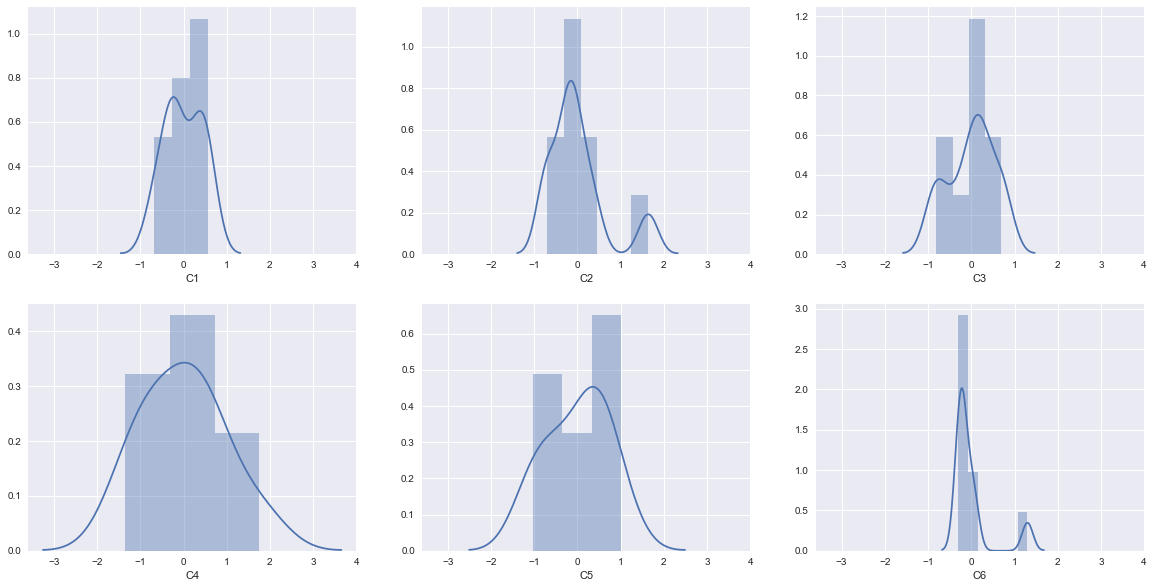

In [18]:
f, axes = plt.subplots(2, 3, figsize=(20, 10), sharex=True)
sns.despine(left=True)
sns.set(color_codes=True)
sns.distplot(df8['C1'],ax=axes[0, 0])
sns.distplot(df8['C2'],ax=axes[0, 1])
sns.distplot(df8['C3'],ax=axes[0, 2])
sns.distplot(df8['C4'],ax=axes[1, 0])
sns.distplot(df8['C5'],ax=axes[1, 1])
sns.distplot(df8['C6'],ax=axes[1, 2])
plt.show()
#%stplotlib inline

In [19]:
## Normality Test for the records
print("C1 =",stats.kstest(df8['C1'], 'norm'))
print("C2 =",stats.kstest(df8['C2'], 'norm'))
print("C3 =",stats.kstest(df8['C3'], 'norm'))
print("C4 =",stats.kstest(df8['C4'], 'norm'))
print("C5 =",stats.kstest(df8['C5'], 'norm'))
print("C6 =",stats.kstest(df8['C6'], 'norm'))

C1 = KstestResult(statistic=0.28925736075397213, pvalue=0.3681663943599871)
C2 = KstestResult(statistic=0.23850769258813037, pvalue=0.62036866943067426)
C3 = KstestResult(statistic=0.24405019448627474, pvalue=0.58922413290084785)
C4 = KstestResult(statistic=0.11384674466173861, pvalue=0.99981271574946451)
C5 = KstestResult(statistic=0.19158332332915018, pvalue=0.89584842119888874)
C6 = KstestResult(statistic=0.3820885778110471, pvalue=0.10855963790294099)


The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.

    -The samples are independent.
    -Each sample is from a normally distributed population.
    -The population standard deviations of the groups are all equal. This property is known as homoscedasticity.
    
- In our example the Samples are independent of each other
- Samples are not normally distributed population
- The population standard deviation of the groups are not equal

So, we will use non-parametric technique "Kruskal-Wallis H-test" which tests the 

##### Null hypothesis: that the population mean of all of cities (not similar in distribution shape) are equal

##### Alternative Hypothesis : Atleast one city has that the population mean different than other cities mean

In [20]:
stats.kruskal(df['C1'], df['C2'], df['C3'], df['C4'], df['C5'], df['C6'] )

KruskalResult(statistic=19.229430696762385, pvalue=0.001741855923378492)

#### Since the p-value is less than 0.05 (the alpha level for 95% confidence level), we can conclude that there is evidence that the the population mean of cities are not equal


## Assumptions Satisfied
Regression analysis has a few general assumptions while specific analysis techniques have added (or reduced) assumptions as well. The following are important general assumptions for regression analysis:

    The training dataset needs to be representative of the population being modeled.

    The independent variables are linearly independent
    
    Homoscedasticity of error, i.e. the variance of error, is consistent across the sample

#### All the assumptions are satisfied for this example